# Ovals of Cassini

Referring to Figure 4.8, The Cassini ovals are a family of quartic curves, sometimes referred to as Cassini ellipses, described by a point such that the product of its distances from two fixed points a distance apart is a constant [8]. For bistatic systems, the system performance may be analyzed by plotting the Cassini ovals for various signal-to-noise ratios.  The Cassini ovals are governed by (Equation 4.65)

\begin{equation}\label{eq:bistatic_range_product_polar}
    (r_t\, r_r)^2 = \Big(\rho^2 + (D/2)^2\Big)^2 - \rho^2\, D^2\, \cos^2\theta
\end{equation}

Set the separation distance, ***D***, between the transmitting and receiving radars (m)

In [1]:
separation_distance = 10e3

Set the system temperature (K), bandwidth (Hz), noise_figure (dB), transmitting and receiving losses (dB), peak transmit power (W), transmitting and receiving antenna gain (dB), operating frequency (Hz), and bistatic target RCS (dBsm)

In [2]:
system_temperature = 290

bandwidth = 10e6

noise_figure = 3

transmit_losses = 4

receive_losses = 6

peak_power = 100e3

transmit_antenna_gain = 30

receive_antenna_gain = 28

frequency = 1e9

bistatic_target_rcs = 10

Set the number of points for plotting the Cassini ovals

In [3]:
number_of_points = 100000

Set the parameters for the Cassini ovals equation
$$ r ^ 4 + a ^ 4 - 2 a ^ 2 r ^ 2(1 + cos(2 \theta)) = b ^ 4 $$

Import the `linspace` and `log10` routines along with some constants from `scipy` for the angle sweep

In [4]:
from scipy import linspace, log10
from scipy.constants import pi, c, k

In [5]:
# Parameter "a"

a = 0.5 * separation_distance


# Full angle sweep

t = linspace(0, 2.0 * pi, number_of_points)

Calculate the bistatic range factor and use this along with the separation distance to calculate SNR<sub>0</sub> (where the factors ***a*** and ***b*** are equal)

In [6]:
# Calculate the wavelength (m)

wavelength = c / frequency


# Calculate the bistatic radar range factor

bistatic_range_factor = (peak_power * transmit_antenna_gain * receive_antenna_gain * wavelength ** 2 * 10.0 ** (bistatic_target_rcs / 10.0)) / ((4.0 * pi) ** 3 * k * system_temperature * bandwidth * 10.0 ** (noise_figure / 10.0) * transmit_losses * receive_losses)


# Calculate the signal to noise ratio at which a = b

SNR_0 = 10.0 * log10(16.0 * bistatic_range_factor / separation_distance ** 4)

Create a list of the signal to noise ratios to plot

In [7]:
SNR = [SNR_0 - 6, SNR_0 - 3, SNR_0, SNR_0 + 3]

Import the `matplotlib` routines for plotting the Cassini ovals

In [8]:
from matplotlib import pyplot as plt  

Import `sqrt`, `sin`, `cos`, `real`, and `imag` from `scipy` for plotting the Cassini ovals

In [9]:
from scipy import sqrt, sin, cos, real, imag

Display the resulting Cassini ovals

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


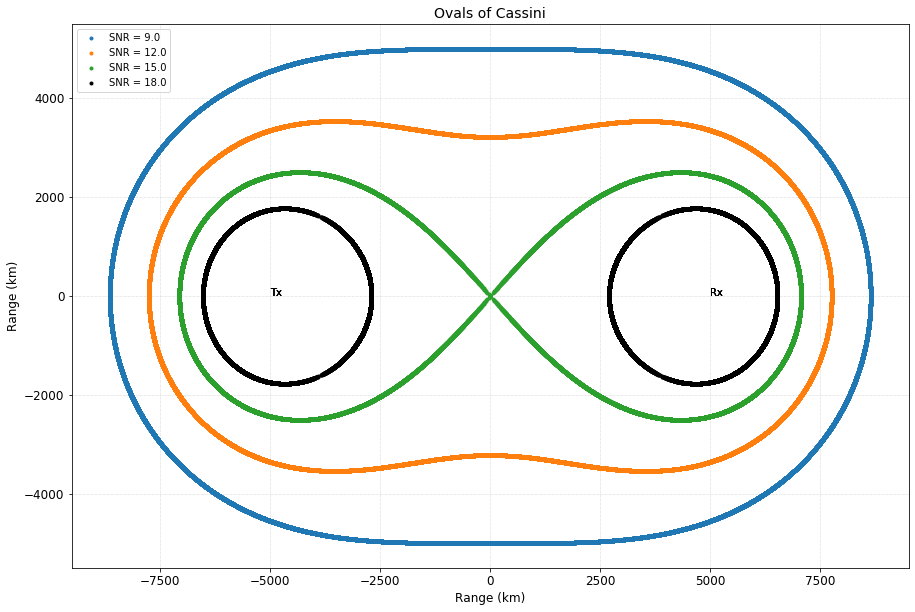

In [10]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Loop over all the desired signal to noise ratios

for s in SNR:
    

    # Convert to linear units

    snr = 10.0 ** (s / 10.0)

    
    # Parameter for Cassini ovals

    b = (bistatic_range_factor / snr) ** 0.25


    if a > b:


         # Calculate the +/- curves

         r1 = sqrt(a ** 2 * (cos(2.0 * t) + sqrt(cos(2 * t) ** 2 - 1.0 + (b / a) ** 4)))

         r2 = sqrt(a ** 2 * (cos(2.0 * t) - sqrt(cos(2 * t) ** 2 - 1.0 + (b / a) ** 4)))



         # Find the correct indices for imaginary parts = 0

         i1 = imag(r1) == 0

         i2 = imag(r2) == 0


         r1 = real(r1)

         r2 = real(r2)



         # Plot both parts of the curve

         label_text = "SNR = {:.1f}".format(s)

         plt.plot(r1[i1] * cos(t[i1]), r1[i1] * sin(t[i1]), 'k.', label=label_text)

         plt.plot(r2[i2] * cos(t[i2]), r2[i2] * sin(t[i2]), 'k.')


    else:


         # Calculate the range for the continuous curves

         r = sqrt(a ** 2 * cos(2 * t) + sqrt(b ** 4 - a ** 4 * sin(2.0 * t) ** 2))


         # Plot the continuous parts

         label_text = "SNR = {:.1f}".format(s)

         plt.plot(r * cos(t), r * sin(t), '.', label=label_text)


    # Add the text for Tx/Rx locations

    plt.text(-a, 0, 'Tx')

    plt.text(a, 0, 'Rx')


    # Set the plot title and labels

    plt.title('Ovals of Cassini', size=14)

    plt.xlabel('Range (km)', size=12)

    plt.ylabel('Range (km)', size=12)


    # Set the tick label size

    plt.tick_params(labelsize=12)


    # Turn on the grid

    plt.grid(linestyle=':', linewidth=0.5)


    # Add the legend

    plt.legend(loc='upper left', prop={'size': 10})